# Ejercicio: Realizar AglomerativeClustering para la base de datos clientes.

In [1]:
import pandas as pd
import numpy as np

#k-medias
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale, StandardScaler

#PCA
from sklearn.decomposition import PCA

#Aglomerativos
from sklearn.cluster import AgglomerativeClustering

#Dendrogramas
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram

In [2]:
datos = pd.read_csv("C:/Users/GabDomDal/Desktop/Ejercicios/Analitica de datos/Trabajo 23/clientes.csv")
display(datos.head())

,ID,Ingreso anual,Gasto
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


In [3]:
X = np.array(datos[['Ingreso anual','Gasto']])

In [4]:
# Escalamos los datos
scaler = StandardScaler()
X_s = scaler.fit_transform(X)

Text(0, 0.5, 'Media de Shilouette')

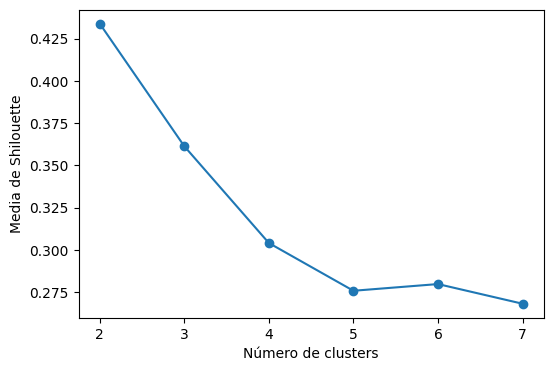

In [5]:
#Selección del número óptimo de cluster.
#Coeficiente de Shilouette
rango=range(2,8) #son los valores de clusters que probaremos para elegir donde se encuentre el máximo
valores_medios=[]

for n_clusters in rango:
    aglom=AgglomerativeClustering(n_clusters=n_clusters, linkage='single')
    etiquetas=aglom.fit_predict(X_s)
    valores_m=silhouette_score(X_s,etiquetas)  #Coeficiente necesita los datos y los grupos que se generaron.
    valores_medios.append(valores_m)
#Obtenemos un gráfico donde sea más visible el número óptimo de clusters, en este caso buscamos el valor máximo
fig, ax=plt.subplots(1,1,figsize=(6,4))
ax.plot(rango,valores_medios, marker='o')
ax.set_xlabel("Número de clusters")
ax.set_ylabel("Media de Shilouette")

Con el coeficiente de silhouette, se determina que el número óptimo de clusters, para single, es 2.

Text(0, 0.5, 'Media de Shilouette')

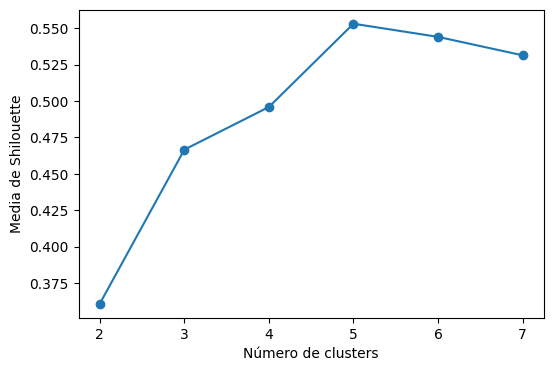

In [11]:
#Selección del número óptimo de cluster.
#Coeficiente de Shilouette
rango=range(2,8) #son los valores de clusters que probaremos para elegir donde se encuentre el máximo
valores_medios=[]

for n_clusters in rango:
    aglom=AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')
    etiquetas=aglom.fit_predict(X_s)
    valores_m=silhouette_score(X_s,etiquetas)  #Coeficiente necesita los datos y los grupos que se generaron.
    valores_medios.append(valores_m)
#Obtenemos un gráfico donde sea más visible el número óptimo de clusters, en este caso buscamos el valor máximo
fig, ax=plt.subplots(1,1,figsize=(6,4))
ax.plot(rango,valores_medios, marker='o')
ax.set_xlabel("Número de clusters")
ax.set_ylabel("Media de Shilouette")

Con el coeficiente de silhouette, se determina que el número óptimo de clusters, para complete, es 5.

Text(0, 0.5, 'Media de Shilouette')

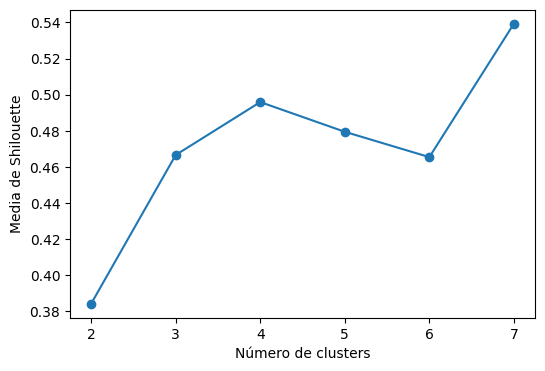

In [12]:
#Selección del número óptimo de cluster.
#Coeficiente de Shilouette
rango=range(2,8) #son los valores de clusters que probaremos para elegir donde se encuentre el máximo
valores_medios=[]

for n_clusters in rango:
    aglom=AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
    etiquetas=aglom.fit_predict(X_s)
    valores_m=silhouette_score(X_s,etiquetas)  #Coeficiente necesita los datos y los grupos que se generaron.
    valores_medios.append(valores_m)
#Obtenemos un gráfico donde sea más visible el número óptimo de clusters, en este caso buscamos el valor máximo
fig, ax=plt.subplots(1,1,figsize=(6,4))
ax.plot(rango,valores_medios, marker='o')
ax.set_xlabel("Número de clusters")
ax.set_ylabel("Media de Shilouette")

Con el coeficiente de silhouette, se determina que el número óptimo de clusters, para average, es 7.

Text(0, 0.5, 'Media de Shilouette')

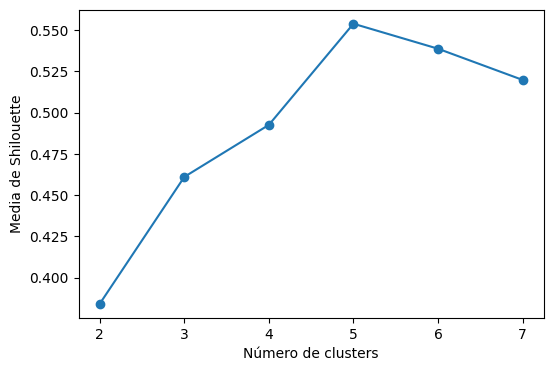

In [13]:
#Selección del número óptimo de cluster.
#Coeficiente de Shilouette
rango=range(2,8) #son los valores de clusters que probaremos para elegir donde se encuentre el máximo
valores_medios=[]

for n_clusters in rango:
    aglom=AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    etiquetas=aglom.fit_predict(X_s)
    valores_m=silhouette_score(X_s,etiquetas)  #Coeficiente necesita los datos y los grupos que se generaron.
    valores_medios.append(valores_m)
#Obtenemos un gráfico donde sea más visible el número óptimo de clusters, en este caso buscamos el valor máximo
fig, ax=plt.subplots(1,1,figsize=(6,4))
ax.plot(rango,valores_medios, marker='o')
ax.set_xlabel("Número de clusters")
ax.set_ylabel("Media de Shilouette")

Con el coeficiente de silhouette, se determina que el número óptimo de clusters, para ward, es 5.

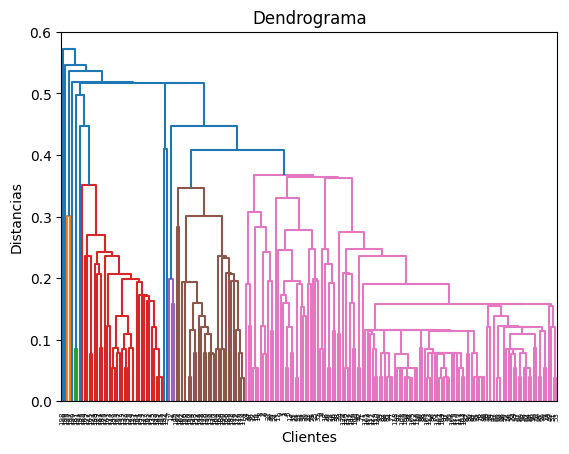

In [7]:
#Visualicemos los dendrogramas con los diferentes métodos
dendrograma=sch.dendrogram(sch.linkage(X_s,method='single'))   #,color_threshold=1)

plt.title('Dendrograma')
plt.xlabel('Clientes')
plt.ylabel('Distancias')
plt.show()

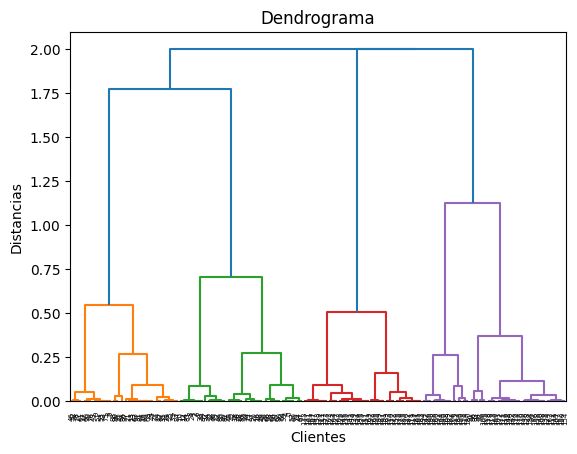

In [ ]:
#Visualicemos los dendrogramas con los diferentes métodos usando la métrica coseno
dendrograma=sch.dendrogram(sch.linkage(X_s,method='complete', metric = 'cosine'))   #,color_threshold=1)

plt.title('Dendrograma')
plt.xlabel('Clientes')
plt.ylabel('Distancias')
plt.show()

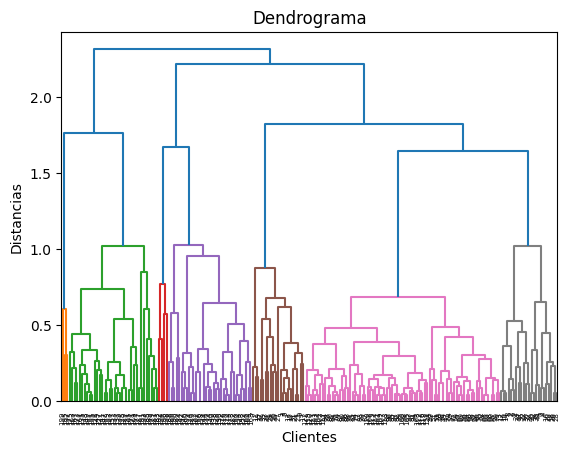

In [9]:
#Visualicemos los dendrogramas con los diferentes métodos
dendrograma=sch.dendrogram(sch.linkage(X_s,method='average'))   #,color_threshold=1)

plt.title('Dendrograma')
plt.xlabel('Clientes')
plt.ylabel('Distancias')
plt.show()

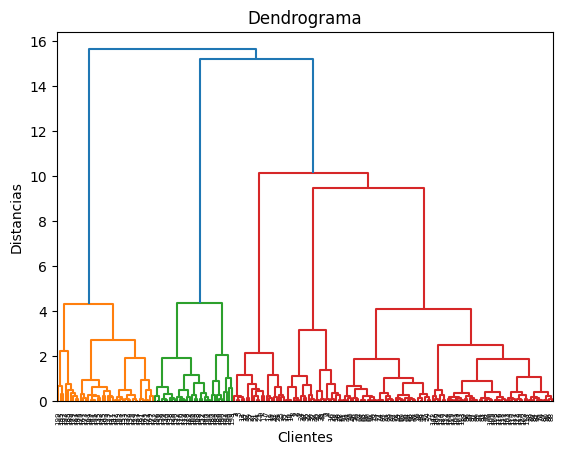

In [20]:
#Visualicemos los dendrogramas con los diferentes métodos
dendrograma=sch.dendrogram(sch.linkage(X_s,method='ward',))   #,color_threshold=1)

plt.title('Dendrograma')
plt.xlabel('Clientes')
plt.ylabel('Distancias')
plt.show()

De los dendogramas anteriores se usará el método complete con métrica cosine para realizar el AglomerativeClustering, ya que es el que mejor separa los grupos visualmente a una distancia de 1.25 para 4 clusters. Aunque el coeficiente de silhouette indicó 5 clusters como óptimo, visualmente se observa que 4 clusters están mejor separados y con mayor uniformidad.

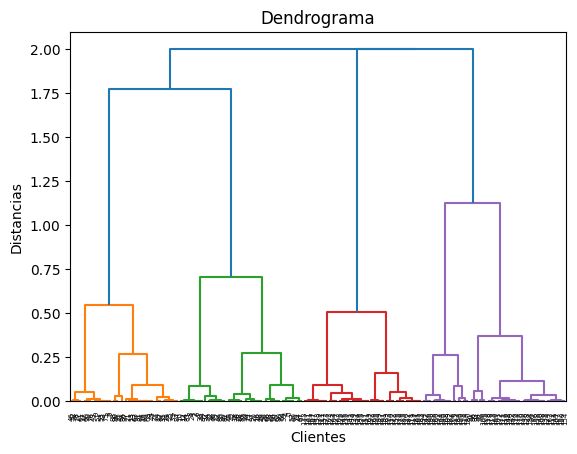

In [22]:
#Visualicemos los dendrogramas con los diferentes métodos usando la métrica de coseno
dendrograma=sch.dendrogram(sch.linkage(X_s,method='complete', metric = 'cosine'), color_threshold=1.25)   #,color_threshold=1)

plt.title('Dendrograma')
plt.xlabel('Clientes')
plt.ylabel('Distancias')
plt.show()

In [25]:
aglom=AgglomerativeClustering(n_clusters=4, linkage='complete', metric = 'cosine', compute_distances=True)
yp=aglom.fit_predict(X_s)  #etiquetas.

In [26]:
aglom.distances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.11022302e-16, 5.55479146e-08, 3.52955886e-07, 4.13820021e-07,
       4.37281171e-07, 4.84211495e-07, 6.05068820e-07, 6.93673979e-07,
       7.48960942e-07, 8.11150800e-07, 1.64688544e-06, 1.71179446e-06,
       2.41572557e-06, 2.84844822e-06, 3.18898885e-06, 3.31637989e-06,
       3.77239086e-06, 4.59609083e-06, 5.13022347e-06, 5.58652358e-06,
       5.91734096e-06, 6.48769303e-06, 6.82126734e-06, 7.05292879e-06,
       7.64868759e-06, 8.16593826e-06, 8.77165809e-06, 9.04838787e-06,
       1.22906972e-05, 1.34910517e-05, 1.51092351e-05, 1.53698383e-05,
       1.62610223e-05, 2.00152477e-05, 2.31206776e-05, 2.33211779e-05,
       2.56593031e-05, 2.56601384e-05, 2.70407616e-05, 2.73875910e-05,
       3.05513778e-05, 3.29203362e-05, 3.33452693e-05, 3.65195981e-05,
       3.93059339e-05, 4.12766215e-05, 4.35016410e-05, 4.35966693e-05,
       4.46291901e-05, 4.97366700e-05, 5.01697675e-05, 5.45957847e-05,
      

In [27]:
aglom.children_

array([[ 48,  49],
       [ 36,  79],
       [129, 131],
       [156, 158],
       [ 65,  68],
       [169, 195],
       [125, 145],
       [ 17,  60],
       [118, 178],
       [159, 175],
       [ 57,  69],
       [143, 202],
       [ 38,  44],
       [116, 148],
       [ 10,  12],
       [ 27,  61],
       [101, 172],
       [187, 191],
       [165, 183],
       [107, 152],
       [  9,  51],
       [132, 170],
       [114, 180],
       [133, 137],
       [ 11,  29],
       [  7,  84],
       [157, 173],
       [179, 185],
       [ 56,  66],
       [108, 138],
       [ 18,  26],
       [161, 167],
       [186, 190],
       [ 91,  96],
       [  6, 212],
       [ 23,  63],
       [124, 162],
       [ 15, 204],
       [  3,   5],
       [ 53,  73],
       [  1,  45],
       [ 54,  59],
       [135, 141],
       [122, 171],
       [146, 168],
       [ 22, 201],
       [128, 134],
       [  0, 210],
       [ 58,  64],
       [112, 144],
       [149, 155],
       [ 31,  81],
       [ 32,

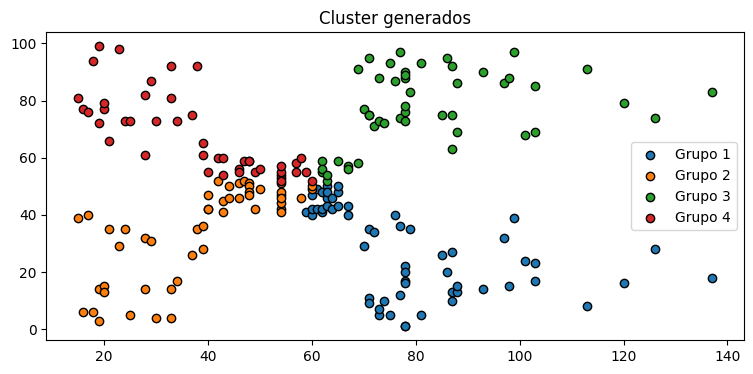

In [30]:
# Clusters generados
fig, ax=plt.subplots(1,1,figsize=(9,4))

#Clusters generados
for i in np.unique(yp):
    ax.scatter(
    x=X[yp==i,0], #ingreso
    y=X[yp==i,1], #gasto
    c=plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
    marker='o',
    edgecolor='black',
    label=f"Grupo {i+1}")
ax.set_title('Cluster generados')
ax.legend();